# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

В рамках всероссийской конференции «Математические методы распознавания образов» был проведен конкурс по решению прикладной задачи из области банковского маркетинга.  

Один из способов повышения эффективности взаимодействия банка с клиентами заключается в том, чтобы отправлять предложение о новой услуге не всем клиентам банка, а только некоторой части, выбираемой по принципу наибольшей склонности к отклику на данное предложение.  

Конкурсное задание заключается в том, чтобы предложить алгоритм, который будет выдавать оценку склонности клиента к положительному отклику по его признаковому описанию. Эта оценка может (хотя и не обязана) интерпретироваться как вероятность положительного отклика.  

Предполагается, что, получив такие оценки для некоторого множества клиентов, банк обратится с предложением только к тем клиентам, у которых значение оценки выше некоторого порога.  
Данные предоставлены ОТП Банком.  


ДАННЫЕ 

Исходная выборка («выборка А») содержит записи о 15 223 клиентов, классифицированных на два класса: 1 — отклик был (1812 клиентов), 0 — отклика не было (13411 клиентов). Ещё 14910 записей отложены в качестве тестовых («выборка Б») – ответы по ним известны только банку.  

Записи (признаковые описания) клиентов состоят из 50 признаков, в состав которых входит, в частности, возраст, пол, социальный статус относительно работы, социальный статус относительно пенсии, количество детей, количество иждивенцев, образование, семейное положение, отрасль работы.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:
path_descr = r'C:\Users\acer\Desktop\skillfactory\2\hw_02\data\otp_description.csv'
path_train = r'C:\Users\acer\Desktop\skillfactory\2\hw_02\data\otp_train.csv'
path_test  = r'C:\Users\acer\Desktop\skillfactory\2\hw_02\data\otp_test.csv'

df_descr = pd.read_csv(path_descr, sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv(path_train, sep='\t', encoding='utf8')

In [5]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


In [6]:
df_train.shape

(15223, 52)

In [7]:
df_test = pd.read_csv(path_test, sep='\t', encoding='utf8')

In [8]:
df_test.shape

(14910, 52)

In [9]:
df_test.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59909969,0,30,1,0,1,1,1,Среднее специальное,Не состоял в браке,...,0,1,2,2,8,0,0,0,0,NaN
1,59910420,0,48,0,1,1,0,0,Среднее,Состою в браке,...,0,0,2,1,15,0,0,0,0,NaN
2,59911223,0,35,1,0,0,1,0,Среднее,Не состоял в браке,...,0,1,1,1,1,0,0,0,0,NaN
3,59911322,0,22,1,0,0,0,0,Среднее,Не состоял в браке,...,0,1,3,2,9,0,0,0,0,NaN
4,59911438,0,27,1,0,1,2,2,Высшее,Состою в браке,...,0,1,1,1,5,0,0,0,0,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [10]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [11]:
df = df_test.append(df_train).reset_index(drop=True)

In [12]:
df.shape

(30133, 53)

In [13]:
df.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample
0,59909969,0,30,1,0,1,1,1,Среднее специальное,Не состоял в браке,...,1,2,2,8,0,0,0,0,NaN,test
1,59910420,0,48,0,1,1,0,0,Среднее,Состою в браке,...,0,2,1,15,0,0,0,0,NaN,test
2,59911223,0,35,1,0,0,1,0,Среднее,Не состоял в браке,...,1,1,1,1,0,0,0,0,NaN,test
3,59911322,0,22,1,0,0,0,0,Среднее,Не состоял в браке,...,1,3,2,9,0,0,0,0,NaN,test
4,59911438,0,27,1,0,1,2,2,Высшее,Состою в браке,...,1,1,1,5,0,0,0,0,NaN,test


### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

In [15]:
df['sample'].value_counts()

train    15223
test     14910
Name: sample, dtype: int64

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [16]:
for i in df.columns: # перебираем все столбцы
    if str(df[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Неоконченное высшее', 'Среднее специальное', 'Среднее', 'Высшее', 'Два и более высших образования', 'Неполное среднее', 'Ученая степень'}


MARITAL_STATUS
{'Разведен(а)', 'Не состоял в браке', 'Состою в браке', 'Вдовец/Вдова', 'Гражданский брак'}


GEN_INDUSTRY
{nan, 'Наука', 'Юридические услуги/нотариальные услуги', 'Логистика', 'Энергетика', 'СМИ/Реклама/PR-агенства', 'Маркетинг', 'Информационные услуги', 'Коммунальное хоз-во/Дорожные службы', 'Страхование', 'Салоны красоты и здоровья', 'Транспорт', 'Развлечения/Искусство', 'Подбор персонала', 'Ресторанный бизнес/Общественное питание', 'Информационные технологии', 'Банк/Финансы', 'Недвижимость', 'Государственная служба', 'Химия/Парфюмерия/Фармацевтика', 'Металлургия/Промышленность/Машиностроение', 'Здравоохранение', 'Сельское хозяйство', 'Строительство', 'Нефтегазовая промышленность', 'Торговля', 'Управляющая компания', 'Туризм', 'Сборочные производства', 'ЧОП/Детективная д-ть', 'Образование', 'Другие сферы'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [17]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

##### Пропуски в данных есть у следующих полей:  

GEN_INDUSTRY               - 27420 заполнено из 30133 (отрасль работы клиента)  

GEN_TITLE                  - 27420 (должность)  

ORG_TP_STATE               - 27420 (форма собственности компании)  

ORG_TP_FCAPITAL            - 27425 (отношение к иностранному капиталу)  

JOB_DIR                    - 27420 (направление деятельности внутри компании)  

=> заменить пропуски на самое популярное значение, либо придумать для пропусков отдельное значение, либо убрать строки с пропущенным значением 


TP_PROVINCE                - 29543 (область торговой точки, где клиент брал последний кредит)  => заменить пропуски на значения из поля FACT_ADDRESS_PROVINCE (область фактического пребывания клиента)


WORK_TIME                  - 27416 (время работы на текущем месте (в месяцах)) => заменить пропуски на среднее значение/медиану/самое популярное значение, либо придумать для пропусков отдельное значение, либо убрать строки с пропущенным значением


PREVIOUS_CARD_NUM_UTILIZED - 600 (количество уже утилизированных карт ( если пусто - 0)) => заменить пропуски на 0

In [18]:
for column_name in ('GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'TP_PROVINCE', 'WORK_TIME', 'PREVIOUS_CARD_NUM_UTILIZED'):
    print('column_name = ', column_name, '\n', df[column_name].value_counts(), '\n')

column_name =  GEN_INDUSTRY 
 Торговля                                     4707
Другие сферы                                 3356
Металлургия/Промышленность/Машиностроение    2707
Государственная служба                       2526
Здравоохранение                              2336
Образование                                  2026
Транспорт                                    1567
Сельское хозяйство                           1387
Строительство                                1179
Коммунальное хоз-во/Дорожные службы          1030
Наука                                         783
Ресторанный бизнес/Общественное питание       734
Нефтегазовая промышленность                   430
Сборочные производства                        346
Банк/Финансы                                  326
ЧОП/Детективная д-ть                          294
Развлечения/Искусство                         281
Энергетика                                    271
Салоны красоты и здоровья                     218
Информационные услуг

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

Есть, например EDUCATION, MARITAL_STATUS, GEN_INDUSTRY и т.д.  

Каждое поле необходимо заменить на набор флагов, число которых соответствует числу категорий в поле.

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [19]:
df.head(2).T

,0,1
AGREEMENT_RK,59909969,59910420
TARGET,0,0
AGE,30,48
SOCSTATUS_WORK_FL,1,0
SOCSTATUS_PENS_FL,0,1
GENDER,1,1
CHILD_TOTAL,1,0
DEPENDANTS,1,0
EDUCATION,Среднее специальное,Среднее
MARITAL_STATUS,Не состоял в браке,Состою в браке


In [20]:
print(df['GEN_INDUSTRY'].count())
print(df.shape[0])

dict_count=df.groupby('GEN_INDUSTRY')['TARGET'].count()

print(str(dict_count[dict_count==dict_count.max()].index[0]))

print(df['GEN_INDUSTRY'][df['GEN_INDUSTRY'].isnull()])

print(df.info())

27420
30133
Торговля
1        NaN
5        NaN
8        NaN
12       NaN
20       NaN
28       NaN
30       NaN
57       NaN
77       NaN
96       NaN
103      NaN
111      NaN
156      NaN
177      NaN
192      NaN
194      NaN
202      NaN
203      NaN
204      NaN
211      NaN
214      NaN
246      NaN
247      NaN
252      NaN
254      NaN
280      NaN
293      NaN
300      NaN
314      NaN
325      NaN
        ... 
29818    NaN
29853    NaN
29937    NaN
29941    NaN
29944    NaN
29978    NaN
29983    NaN
29997    NaN
29999    NaN
30010    NaN
30024    NaN
30029    NaN
30043    NaN
30061    NaN
30062    NaN
30070    NaN
30072    NaN
30074    NaN
30076    NaN
30077    NaN
30082    NaN
30085    NaN
30087    NaN
30088    NaN
30091    NaN
30095    NaN
30101    NaN
30106    NaN
30107    NaN
30131    NaN
Name: GEN_INDUSTRY, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-nul

In [43]:
def preproc_data(df_input):
    df_output = df_input.copy()  
    df_output = df_output.drop('AGREEMENT_RK', axis = 1)

    for column_name in df_output.columns:
        if (df_output[column_name].count() < df_output.shape[0]) and column_name!='PREVIOUS_CARD_NUM_UTILIZED' and column_name!='TP_PROVINCE':
            dict_count=df_output.groupby(column_name)['TARGET'].count()
            popular_value=dict_count[dict_count==dict_count.max()].index[0]
            df_output[column_name][df_output[column_name].isnull()]=popular_value
    df_output['PREVIOUS_CARD_NUM_UTILIZED'][df_output['PREVIOUS_CARD_NUM_UTILIZED'].isnull()]=0
    df_output['TP_PROVINCE'][df_output['TP_PROVINCE'].isnull()]=df_output['FACT_ADDRESS_PROVINCE'][df_output['TP_PROVINCE'].isnull()]
    
    

    for column_name in df_output.columns:
        if str(df_output[column_name].dtype) == 'object':
            try: 
                df_output[column_name]=df_output[column_name].map(lambda x: x.replace(',', '.')).astype('float')
            except:
                df_output[column_name]=df_output[column_name]
       
    df_output=pd.get_dummies(df_output)
    
    return df_output


def preproc_data_old(df_input):
    df_output = df_input.copy()  
    df_output = df_output.drop('AGREEMENT_RK', axis = 1)
    df_output['PREVIOUS_CARD_NUM_UTILIZED'][df_output['PREVIOUS_CARD_NUM_UTILIZED'].isnull()]=0

    for column_name in df_output.columns:
        if (df_output[column_name].count() < df_output.shape[0]):
            df_output=df_output[df_output[column_name].notnull()]
    
    for column_name in df_output.columns:
        if str(df_output[column_name].dtype) == 'object':
            try: 
                df_output[column_name]=df_output[column_name].map(lambda x: x.replace(',', '.')).astype('float')
            except:
                df_output[column_name]=df_output[column_name]
       
    df_output=pd.get_dummies(df_output)
    
    return df_output


df_new=preproc_data(df).copy()
df_new.info()
df_new.head(2).T

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Columns: 447 entries, TARGET to sample_train
dtypes: float64(7), int64(31), uint8(409)
memory usage: 20.5 MB


,0,1
TARGET,0.0,0.0
AGE,30.0,48.0
SOCSTATUS_WORK_FL,1.0,0.0
SOCSTATUS_PENS_FL,0.0,1.0
GENDER,1.0,1.0
CHILD_TOTAL,1.0,0.0
DEPENDANTS,1.0,0.0
PERSONAL_INCOME,7000.0,4100.0
REG_FACT_FL,0.0,1.0
FACT_POST_FL,1.0,1.0


In [44]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample_train == 1').drop(['sample_test'], axis=1).drop(['sample_train'], axis=1)
df_test_preproc = df_preproc.query('sample_test == 1').drop(['sample_test'], axis=1).drop(['sample_train'], axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [45]:
df_train_preproc.columns

Index(['TARGET', 'AGE', 'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL', 'GENDER',
       'CHILD_TOTAL', 'DEPENDANTS', 'PERSONAL_INCOME', 'REG_FACT_FL',
       'FACT_POST_FL',
       ...
       'REGION_NM_ДАЛЬНЕВОСТОЧНЫЙ', 'REGION_NM_ЗАПАДНО-СИБИРСКИЙ',
       'REGION_NM_ПОВОЛЖСКИЙ', 'REGION_NM_ПРИВОЛЖСКИЙ',
       'REGION_NM_СЕВЕРО-ЗАПАДНЫЙ', 'REGION_NM_УРАЛЬСКИЙ',
       'REGION_NM_ЦЕНТРАЛЬНЫЙ 1', 'REGION_NM_ЦЕНТРАЛЬНЫЙ 2',
       'REGION_NM_ЦЕНТРАЛЬНЫЙ ОФИС', 'REGION_NM_ЮЖНЫЙ'],
      dtype='object', length=445)

In [81]:
X      = df_train_preproc.iloc[:, 1:].values
X_test = df_test_preproc.iloc[:, 1:].values

y      = df_train_preproc.iloc[:, 0].values
y_test = df_test_preproc.iloc[:, 0].values

print(X, y)
print(X_test, y_test)

[[ 49.   1.   0. ...,   0.   0.   0.]
 [ 32.   1.   0. ...,   0.   0.   1.]
 [ 52.   1.   0. ...,   0.   0.   0.]
 ..., 
 [ 22.   1.   0. ...,   0.   0.   0.]
 [ 60.   0.   1. ...,   0.   0.   0.]
 [ 37.   1.   0. ...,   0.   0.   1.]] [0 0 0 ..., 0 0 0]
[[ 30.   1.   0. ...,   0.   0.   0.]
 [ 48.   0.   1. ...,   0.   0.   0.]
 [ 35.   1.   0. ...,   1.   0.   0.]
 ..., 
 [ 33.   1.   0. ...,   0.   0.   1.]
 [ 61.   0.   1. ...,   0.   0.   0.]
 [ 40.   1.   0. ...,   1.   0.   0.]] [0 0 0 ..., 0 0 0]


#### Задание 5. Обучение и оценка качества разных моделей

In [82]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

X_train, X_train_test, y_train, y_train_test=train_test_split(X, y, test_size=0.3, random_state=42)

In [83]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

model_tc=DecisionTreeClassifier()
model_tc.fit(X_train, y_train)
predict_tc       =model_tc.predict(X_train_test)
predict_proba_tc =model_tc.predict_proba(X_train_test)

model_rf=RandomForestClassifier()
model_rf.fit(X_train, y_train)
predict_rf       =model_rf.predict(X_train_test)
predict_proba_rf =model_rf.predict_proba(X_train_test)

model_lr=LogisticRegression()
model_lr.fit(X_train, y_train)
predict_lr       =model_lr.predict(X_train_test)
predict_proba_lr =model_lr.predict_proba(X_train_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:352: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [84]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score

df_standart_metrics=pd.DataFrame(columns=[['model_name', 'accuracy_score', 'precision_score', 'recall_score']])

def view_standart_metrics(model_name):
    
    global df_standart_metrics
    
    model_name_=str(model_name).replace('<class ', '').replace('>', '').replace('sklearn.', '').replace('linear_model.logistic.', '').replace('ensemble.forest.', '').replace('tree.tree.', '')
    model=model_name()
    model.fit(X_train, y_train)
    predict       =model.predict(X_train_test)
    predict_proba =model.predict_proba(X_train_test)
    
    accuracy_score_  = accuracy_score(y_train_test, predict)
    precision_score_ = precision_score(y_train_test, predict)
    recall_score_    = recall_score(y_train_test, predict)
    df_standart_metrics = pd.DataFrame(np.array([[model_name_, accuracy_score_, precision_score_, recall_score_]]), columns=['model_name', 'accuracy_score', 'precision_score', 'recall_score']).append(df_standart_metrics, ignore_index=True)

for m in (DecisionTreeClassifier, RandomForestClassifier, LogisticRegression):
    view_standart_metrics(m)

print(df_standart_metrics)

                 model_name  accuracy_score precision_score     recall_score
0      'LogisticRegression'  0.877819137289  0.285714285714  0.0036036036036
1  'RandomForestClassifier'  0.876505364572  0.285714285714  0.0108108108108
2  'DecisionTreeClassifier'  0.800744471206  0.170686456401   0.165765765766


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:352: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


Accuracy (доля верных ответов) = (все правильно угаданные объекты)/(все объекты) = (TP+TN)/(TP+FP+TN+FN) должна -> 1  

Precision (точность; отражает насколько много объектов, помеченных как единица, действительно относится к классу единиц) 
    = (все объекты, правильно отнесенные к классу единиц)/(все объекты, отнесенные к классу единиц) = (TP)/(TP+FP) должна -> 1  
    
Recall (полнота; отражает насколько много единиц было помечено алгоритмом как единица)
    = (все объекты, правильно отнесенные к классу единиц)/(все объекты, являющиеся единицами) = (TP)/(TP+FN) должна -> 1  

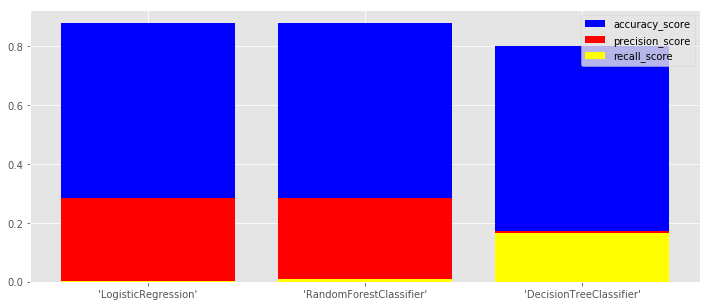

In [86]:
# Визуализировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

X_1 = df_standart_metrics['model_name'].values
Y_1 = df_standart_metrics['accuracy_score'].values.astype('float64')
Y_2 = df_standart_metrics['precision_score'].values.astype('float64')
Y_3 = df_standart_metrics['recall_score'].values.astype('float64')

B1=plt.bar([1, 2, 3], Y_1, color='blue')
B2=plt.bar([1, 2, 3], Y_2, color='red')
B3=plt.bar([1, 2, 3], Y_3, color='yellow')
plt.xticks([1, 2, 3], X_1)
plt.legend([B1, B2, B3], ['accuracy_score', 'precision_score', 'recall_score'])
plt.show()

Низкие значения precision и recall. В коде ошибка?

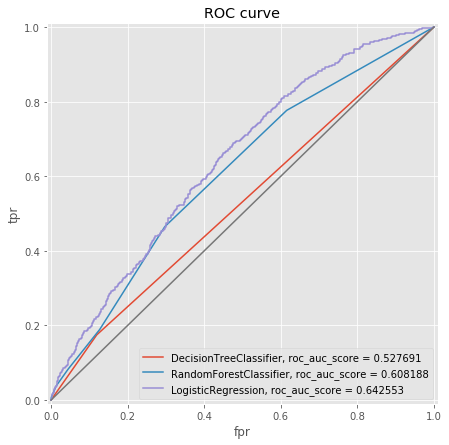

In [98]:
# Потроить roc-кривые всех моделей на одном графике
# Вывести roc_auc каждой модели

from sklearn.metrics import roc_auc_score, roc_curve
fpr_tc, tpr_tc, thresholds_tc = roc_curve(y_train_test, predict_proba_tc[:,1])
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_train_test, predict_proba_rf[:,1])
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_train_test, predict_proba_lr[:,1])
roc_auc_score_tc = roc_auc_score(y_train_test, predict_proba_tc[:,1])
roc_auc_score_rf = roc_auc_score(y_train_test, predict_proba_rf[:,1])
roc_auc_score_lr = roc_auc_score(y_train_test, predict_proba_lr[:,1])
plt.figure(figsize=(7, 7))
plt.plot(fpr_tc, tpr_tc, label="DecisionTreeClassifier, roc_auc_score = %f"%(roc_auc_score_tc, ))
plt.plot(fpr_rf, tpr_rf, label="RandomForestClassifier, roc_auc_score = %f"%(roc_auc_score_rf, ))
plt.plot(fpr_lr, tpr_lr, label="LogisticRegression, roc_auc_score = %f"%(roc_auc_score_lr, ))
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.legend()
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.show()

In [106]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

print('DecisionTreeClassifier, mean_roc_auc = ', cross_val_score(model_tc, X, y, cv=10, scoring='roc_auc').mean())
print('RandomForestClassifier, mean_roc_auc = ', cross_val_score(model_rf, X, y, cv=10, scoring='roc_auc').mean())
print('LogisticRegression, mean_roc_auc = ', cross_val_score(model_lr, X, y, cv=10, scoring='roc_auc').mean())

DecisionTreeClassifier, mean_roc_auc =  0.532513317978
RandomForestClassifier, mean_roc_auc =  0.592548012484
LogisticRegression, mean_roc_auc =  0.641757823489


In [118]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

def Use_StratifiedKFold(model, model_name):
    global cv
    roc_auc_score_ = list()
    for train, test in cv.split(X, y):
        probas_ = model.fit(X[train], y[train]).predict_proba(X[test])
        roc_auc_score_.append(roc_auc_score(y[test], probas_[:,1]))
    print(model_name, ', mean_roc_auc = ', np.mean(roc_auc_score_))
    
Use_StratifiedKFold(model_tc, 'DecisionTreeClassifier')
Use_StratifiedKFold(model_rf, 'RandomForestClassifier')
Use_StratifiedKFold(model_lr, 'LogisticRegression')

DecisionTreeClassifier , mean_roc_auc =  0.52801899913
RandomForestClassifier , mean_roc_auc =  0.595130114331


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:352: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


LogisticRegression , mean_roc_auc =  0.636643139586


In [119]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки

predict_lr_test       =model_lr.predict(X_test)
predict_proba_lr_test =model_lr.predict_proba(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:352: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


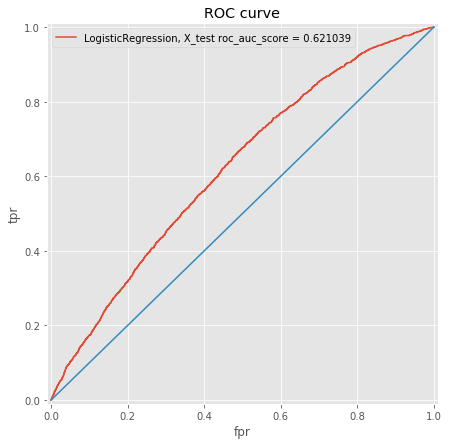

In [120]:
# Померить roc_auc на тесте

from sklearn.metrics import roc_auc_score, roc_curve
fpr_lr_test, tpr_lr_test, thresholds_lr_test = roc_curve(y_test, predict_proba_lr_test[:,1])
roc_auc_score_lr_test = roc_auc_score(y_test, predict_proba_lr_test[:,1])
plt.figure(figsize=(7, 7))
plt.plot(fpr_lr_test, tpr_lr_test, label="LogisticRegression, X_test roc_auc_score = %f"%(roc_auc_score_lr_test, ))
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.legend()
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.show()